# Looking at Exclamations
In my tok/type analysis file, I tried looking at ! and ?, but realized that these are total counts, and so won't tell me how often a character uses those means of expression. I'd rather count them by line and compute averages

In [1]:
import pandas as pd

In [2]:
all_movies_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_tagged_dialogue.pkl")

In [3]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 16 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
POS                 13442 non-null object
Tag_Freq            13442 non-null object
dtypes: int64(4), object(12)
memory usage: 1.1+ MB


In [4]:
all_movies_df.reset_index(drop=True, inplace=True)

In [5]:
all_movies_df.Text.iloc[1]

'what wouldst thou know, my queen ? '

In [6]:
all_movies_df.Tokens.iloc[1].count('?')

1

In [7]:
all_movies_df['Questions'] = all_movies_df.Tokens.map(lambda x: x.count('?'))

In [8]:
all_movies_df['Exclamations'] = all_movies_df.Tokens.map(lambda x: x.count('!'))

In [9]:
all_movies_df['Ellipses'] = all_movies_df.Tokens.map(lambda x: x.count('...'))

In [10]:
all_movies_df.describe()

,UTTERANCE_NUMBER,Year,Token_Count,Type_Count,Questions,Exclamations,Ellipses
count,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000
mean,345.067624,2000.284481,12.088826,10.152581,0.289763,0.529014,0.117021
std,216.550700,18.135020,12.980644,8.822760,0.577353,0.914270,0.403552
min,1.000000,1937.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,164.000000,1995.000000,5.000000,4.000000,0.000000,0.000000,0.000000
50%,325.500000,2008.000000,8.000000,8.000000,0.000000,0.000000,0.000000
75%,507.000000,2012.000000,15.000000,13.000000,0.000000,1.000000,0.000000
max,928.000000,2016.000000,300.000000,140.000000,7.000000,14.000000,6.000000


In [11]:
all_movies_df[all_movies_df.Exclamations == 14]

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count,POS,Tag_Freq,Questions,Exclamations,Ellipses
5689,LATE,f,Tangled,PRO,D,rapunzel,PRINCESS,"look at the world so close, and i’m halfway to...",186,2010,"[look, at, the, world, so, close, ,, and, i, ’...","{furious, know, ,, smell, when, d, ?, have, bi...",244,110,"[(look, NN), (at, IN), (the, DT), (world, NN),...","{'NN': 49, 'IN': 10, 'DT': 14, 'RB': 18, 'JJ':...",3,14,0


In [12]:
all_movies_df.Text.iloc[5689]

'look at the world so close, and i’m halfway to it! look at it all so big, do i even dare? look at me, there at last! i just have to do it should i? no. here i go…  just smell the grass! the dirt! just like i dreamed they’d be! just feel that summer breeze, the way it’s calling me for like the first time ever, i’m completely free! i could go running, and racing, and dancing, and chasing and leaping, and bounding, hair flying, heart pounding and splashing, and reeling, and finally feeling that’s when my life begins!  i can’t believe i did this. *i can’t believe i did this.* i can’t believe i did this! haha. *mother would be so furious.* that’s okay! i mean, what she doesn’t know won’t kill her, right? *oh my gosh, this would kill her.* this is so fun! *i am a horrible daughter. i’m going back.* i am never going back! woo-hoo! *i am a despicable human being.* woo-hoo! best. day. ever!'

In [13]:
from matplotlib import pyplot as plt

In [14]:
#first, only look at gender
all_movies_df = all_movies_df[all_movies_df.Gender != 'n']

In [15]:
all_movies_df.describe()

,UTTERANCE_NUMBER,Year,Token_Count,Type_Count,Questions,Exclamations,Ellipses
count,13130.000000,13130.000000,13130.000000,13130.000000,13130.000000,13130.000000,13130.000000
mean,345.277761,2000.272658,12.154303,10.207540,0.292308,0.519117,0.117593
std,215.603912,18.192469,13.068378,8.865896,0.577600,0.901489,0.405089
min,1.000000,1937.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,165.000000,1995.000000,5.000000,4.000000,0.000000,0.000000,0.000000
50%,326.000000,2008.000000,9.000000,8.000000,0.000000,0.000000,0.000000
75%,506.000000,2012.000000,15.000000,13.000000,0.000000,1.000000,0.000000
max,928.000000,2016.000000,300.000000,140.000000,7.000000,14.000000,6.000000


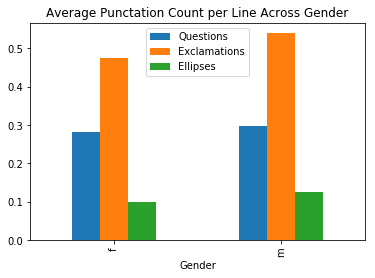

In [59]:
general = all_movies_df.groupby('Gender')['Questions', 'Exclamations', 'Ellipses'].mean()
general.plot(kind='bar')
plt.title("Average Punctation Count per Line Across Gender")
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_punc_gen.png")

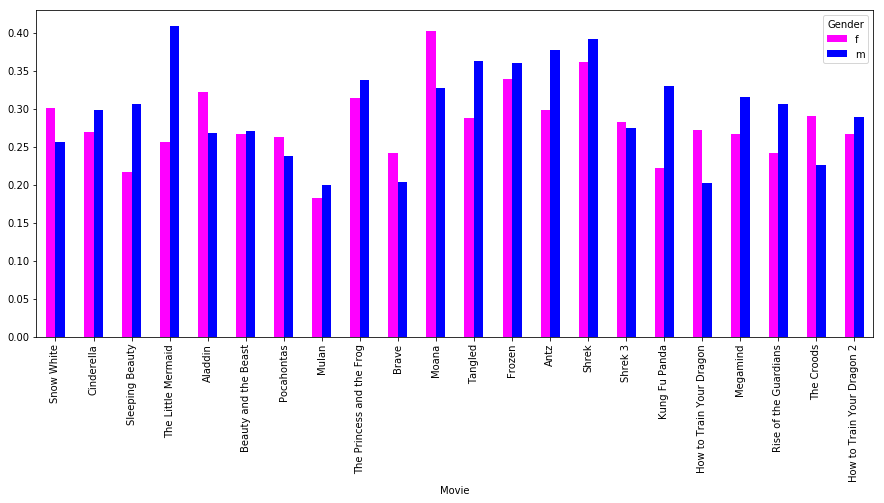

In [23]:
general = all_movies_df.groupby(['Movie','Gender'], sort=False)['Questions'].mean()
general.unstack().plot(kind='bar', color=['magenta', 'blue'], figsize=(15, 6))

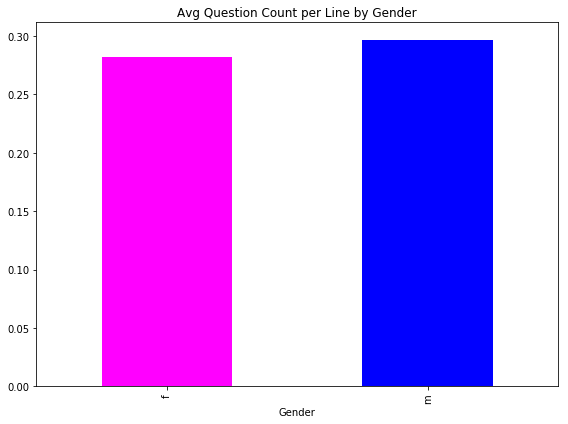

In [66]:
general = all_movies_df.groupby('Gender')['Questions'].mean()
general.plot(kind='bar', color=['magenta', 'blue'], figsize=(8, 6))
plt.title("Avg Question Count per Line by Gender")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ques_gen.png")

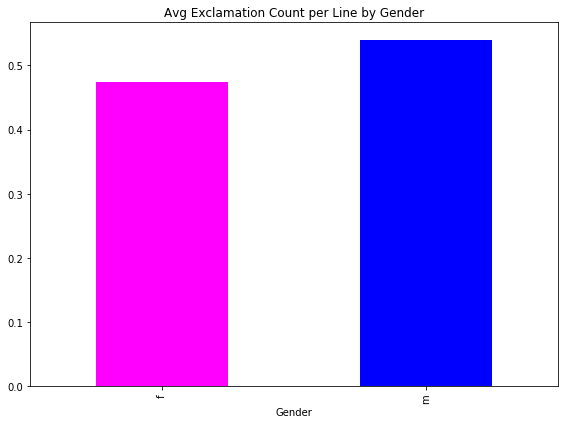

In [68]:
general = all_movies_df.groupby('Gender')['Exclamations'].mean()
general.plot(kind='bar', color=['magenta', 'blue'], figsize=(8, 6))
plt.title("Avg Exclamation Count per Line by Gender")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\exclam_gen.png")

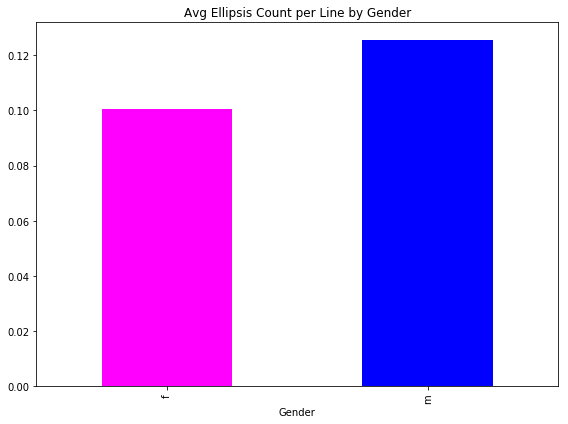

In [69]:
general = all_movies_df.groupby('Gender')['Ellipses'].mean()
general.plot(kind='bar', color=['magenta', 'blue'], figsize=(8, 6))
plt.title("Avg Ellipsis Count per Line by Gender")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ellip_gen.png")

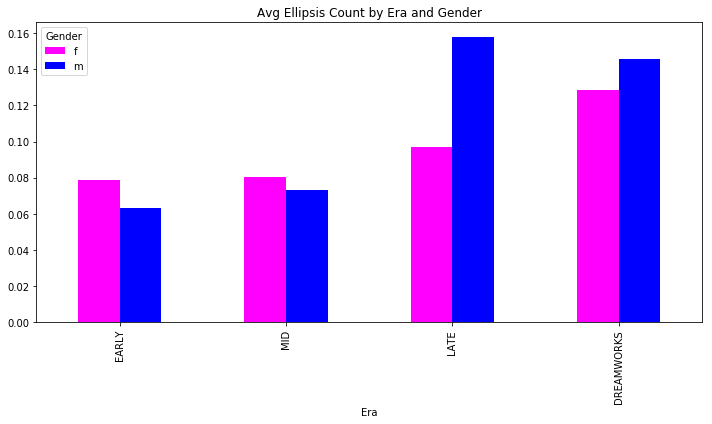

In [73]:
general = all_movies_df.groupby(['Disney_Period','Gender'], sort=False)['Ellipses'].mean()
general.unstack().plot(kind='bar', color=['magenta', 'blue'], figsize=(10, 6))
plt.title("Avg Ellipsis Count by Era and Gender")
plt.xlabel('Era')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ellip_gen_era.png")

In [ ]:
#females use more than men in older movies, but in both genders use goes up over time. May be due too formatting?

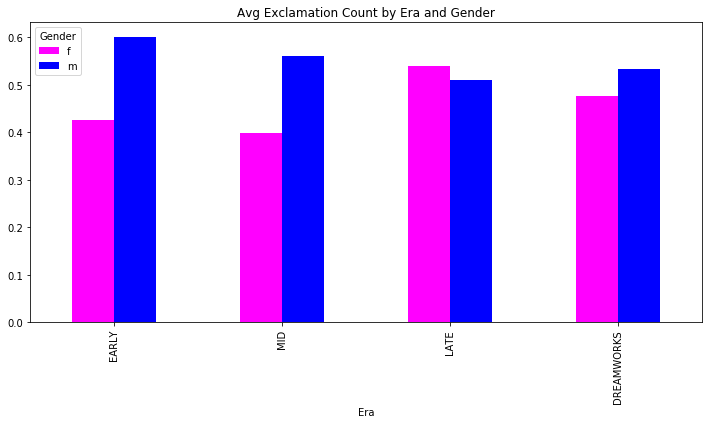

In [74]:
general = all_movies_df.groupby(['Disney_Period','Gender'], sort=False)['Exclamations'].mean()
general.unstack().plot(kind='bar', color=['magenta', 'blue'], figsize=(10, 6))
plt.title("Avg Exclamation Count by Era and Gender")
plt.xlabel('Era')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\exclam_gen_era.png")

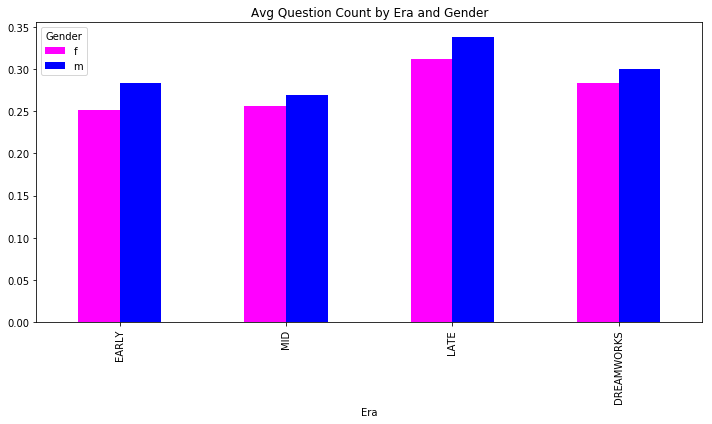

In [75]:
general = all_movies_df.groupby(['Disney_Period','Gender'], sort=False)['Questions'].mean()
general.unstack().plot(kind='bar', color=['magenta', 'blue'], figsize=(10, 6))
plt.title("Avg Question Count by Era and Gender")
plt.xlabel("Era")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ques_gen_era.png")
#not much has changed here...

### Same stuff, but by role!

In [34]:
all_movies_df_2 = all_movies_df[all_movies_df.Role != 'N']

In [35]:
all_movies_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11320 entries, 0 to 13441
Data columns (total 19 columns):
Disney_Period       11320 non-null object
Gender              11320 non-null object
Movie               11320 non-null object
Role                11320 non-null object
Song                11320 non-null object
Speaker             11320 non-null object
Speaker_Status      11320 non-null object
Text                11320 non-null object
UTTERANCE_NUMBER    11320 non-null int64
Year                11320 non-null int64
Tokens              11320 non-null object
Types               11320 non-null object
Token_Count         11320 non-null int64
Type_Count          11320 non-null int64
POS                 11320 non-null object
Tag_Freq            11320 non-null object
Questions           11320 non-null int64
Exclamations        11320 non-null int64
Ellipses            11320 non-null int64
dtypes: int64(7), object(12)
memory usage: 1.2+ MB


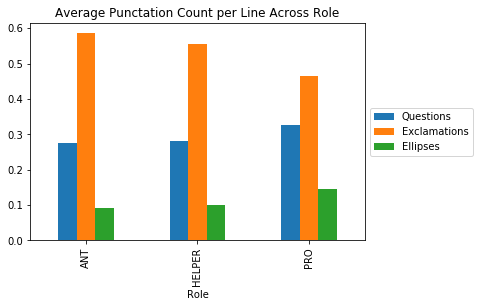

In [61]:
general = all_movies_df_2.groupby('Role')['Questions', 'Exclamations', 'Ellipses'].mean()
general.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average Punctation Count per Line Across Role")
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_punc_role.png")
#antagonists use more exclamations, but ask fewer questions and use fewer ellipses...

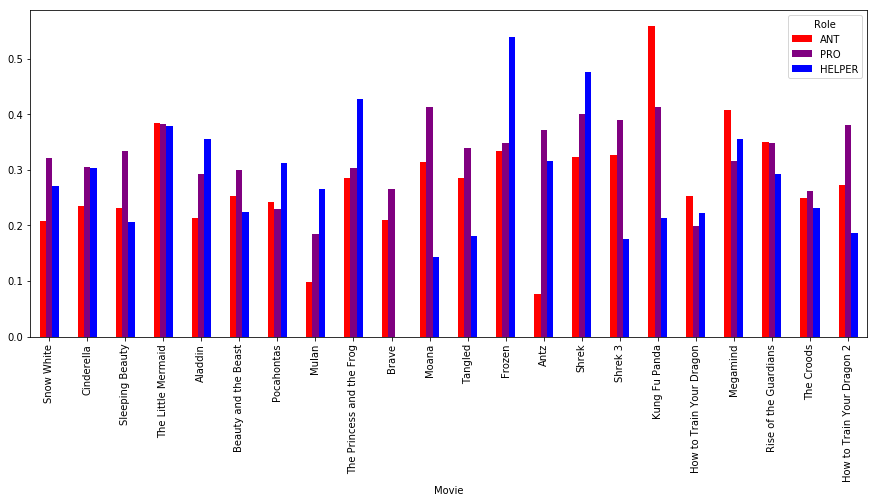

In [38]:
general = all_movies_df_2.groupby(['Movie','Role'], sort=False)['Questions'].mean()
general.unstack().plot(kind='bar', color=['red', 'purple', 'blue'], figsize=(15, 6))

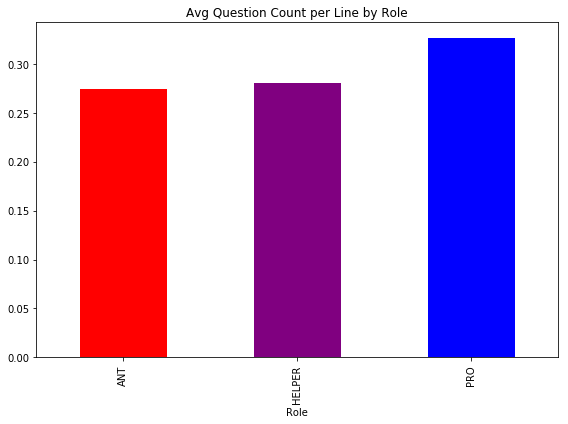

In [76]:
general = all_movies_df_2.groupby('Role')['Questions'].mean()
general.plot(kind='bar', color=['red','purple', 'blue'], figsize=(8, 6))
plt.title("Avg Question Count per Line by Role")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ques_role.png")

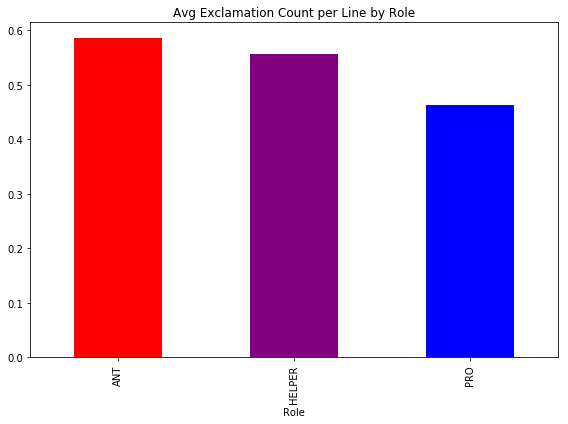

In [77]:
general = all_movies_df_2.groupby('Role')['Exclamations'].mean()
general.plot(kind='bar', color=['red','purple', 'blue'], figsize=(8, 6))
plt.title("Avg Exclamation Count per Line by Role")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\exclam_role.png")

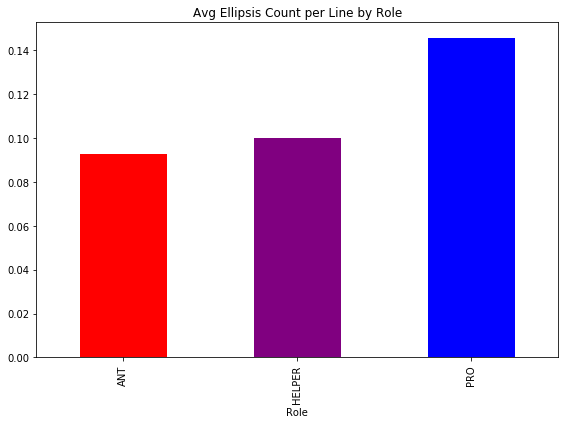

In [78]:
general = all_movies_df_2.groupby('Role')['Ellipses'].mean()
general.plot(kind='bar', color=['red','purple', 'blue'], figsize=(8, 6))
plt.title("Avg Ellipsis Count per Line by Role")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ellip_role.png")

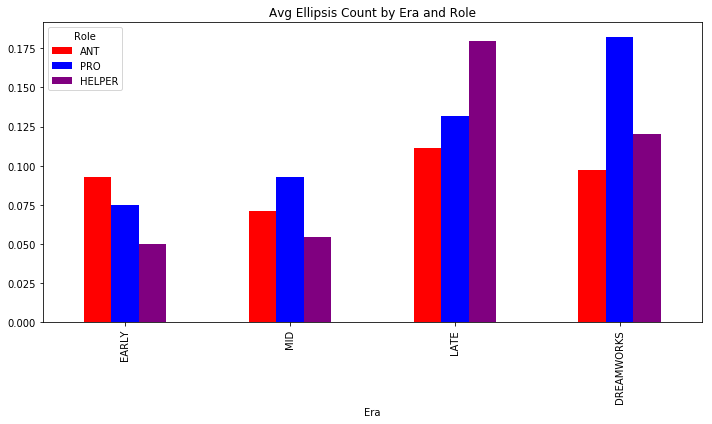

In [79]:
general = all_movies_df_2.groupby(['Disney_Period','Role'], sort=False)['Ellipses'].mean()
general.unstack().plot(kind='bar', color=['red', 'blue', 'purple'], figsize=(10, 6))
plt.title("Avg Ellipsis Count by Era and Role")
plt.xlabel("Era")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ellip_role_era.png")

In [ ]:
#females use more than men in older movies, but in both genders use goes up over time. May be due too formatting?

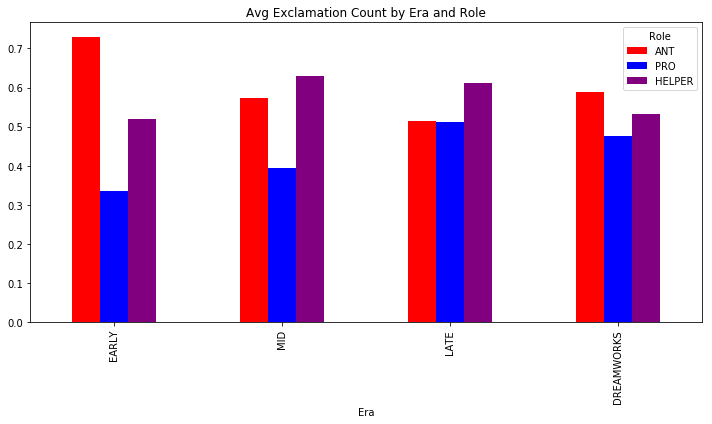

In [80]:
general = all_movies_df_2.groupby(['Disney_Period','Role'], sort=False)['Exclamations'].mean()
general.unstack().plot(kind='bar', color=['red','blue', 'purple'], figsize=(10, 6))
plt.title("Avg Exclamation Count by Era and Role")
plt.xlabel("Era")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\exclam_role_era.png")

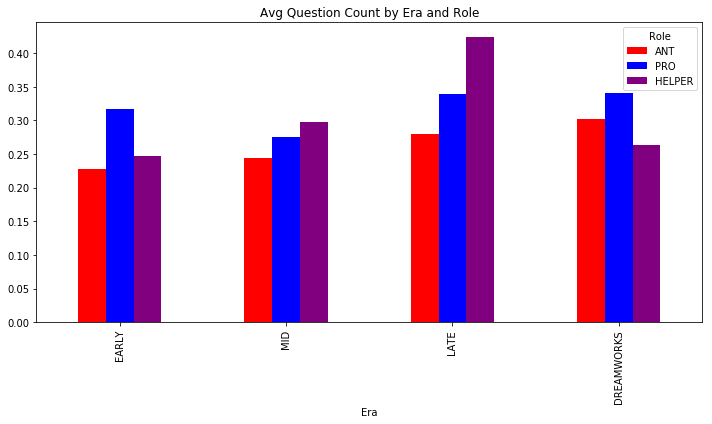

In [81]:
general = all_movies_df_2.groupby(['Disney_Period','Role'], sort=False)['Questions'].mean()
general.unstack().plot(kind='bar', color=['red', 'blue', 'purple'], figsize=(10, 6))
plt.title("Avg Question Count by Era and Role")
plt.xlabel("Era")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ques_role_era.png")

### Grouping by Role and Gender

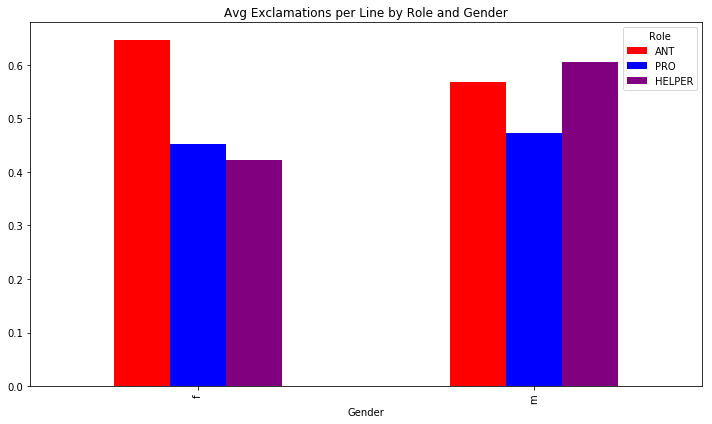

In [83]:
general = all_movies_df_2.groupby(['Gender','Role'], sort=False)['Exclamations'].mean()
general.unstack().plot(kind='bar', color=['red','blue', 'purple'], figsize=(10, 6))
plt.title('Avg Exclamations per Line by Role and Gender')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\exclam_gen_role.png")

In [51]:
#female antagonists shout more than male antagonists do...and female helpers shout less than male helpers do

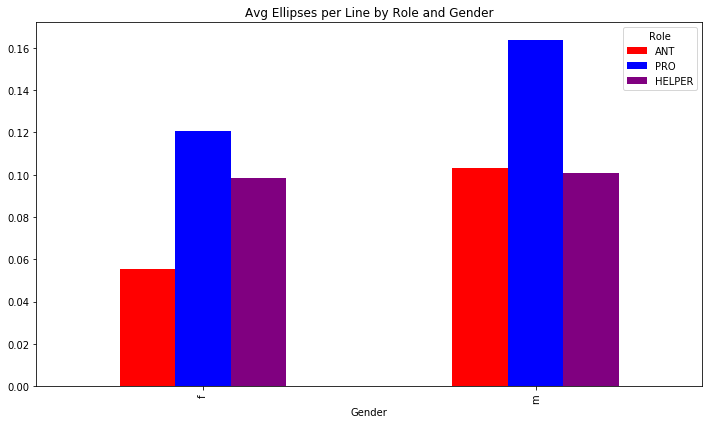

In [85]:
general = all_movies_df_2.groupby(['Gender','Role'], sort=False)['Ellipses'].mean()
general.unstack().plot(kind='bar', color=['red','blue', 'purple'], figsize=(10, 6))
plt.title('Avg Ellipses per Line by Role and Gender')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ellip_gen_role.png")

In [57]:
#female protagonists are much more hesitant than female antagonists
#male antagonists are more hesitant than female antagonists.

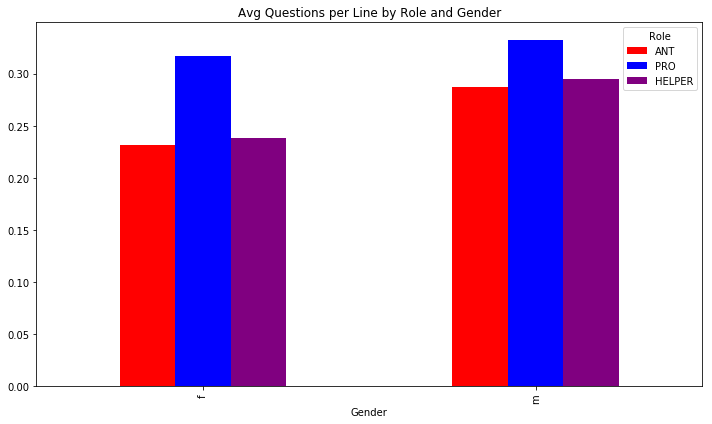

In [84]:
general = all_movies_df_2.groupby(['Gender','Role'], sort=False)['Questions'].mean()
general.unstack().plot(kind='bar', color=['red','blue', 'purple'], figsize=(10, 6))
plt.title('Avg Questions per Line by Role and Gender')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\ques_gen_role.png")

In [ ]:
#female protagonists actually ask slightly fewer questions than male protagonists
#female villains ask fewer questions than male villains